# Swan Teleco Project

<img src = "https://media.istockphoto.com/id/1176054530/photo/smart-city-and-communication-network-concept-5g-lpwa-wireless-communication.jpg?b=1&s=612x612&w=0&k=20&c=8DEL0CRoz5KAiDx6K9mFmb13FF9Sv54b9W1anOfmvOc=">

### Project Aims

Create a classification model to achieve the following objectives:
<ul>
    <li>Predict the 500 customers most likely to churn.</li>
    <li>Create a customer list of churn risk.</li>
    <li>Investigate the demographics of churners.</li>
    <li>Determine which factors most influence churning.</li>
    <li>Which sign-up factors should we incentivise.</li>
</ul>

### Notebook Contents
<ol>
    <li>Import the Data</li>
    <li>Data Cleaning</li>
    <li>Exploratory Data Analysis</li>
    <li>Feature Enigneering</li>
    <li>Model Development and Evaluation<l/i>
    <li>Churn Predictions</li>
        </ol>

### 1 Importing the Libraries

In [7]:
#pip install imbalanced-learn

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

### 1.1 Load in the dataframe

In [10]:
# Set the file path of the Excel file
file_path = 'Project Data.xlsx'

# Read the Excel file into a pandas dataframe
df = pd.read_excel(file_path)

#set opition to display all the columns
pd.set_option('display.max_columns', None)

In [11]:
#Check the first five rows of the dataframe
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [12]:
#Check the last five rowns of the dataframe
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,NaN


In [13]:
#Check the shape of the dataframe
df.shape

(7043, 31)

In [14]:
#Have a look at all our columns
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [15]:
#Check the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Note: 
* It looks like 'Total Charges' should be numeric but it is an object.
* We have 5174 null values in 'Churn Reason'.

### 2. Data Cleaning

In [18]:
# Check the data types
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [19]:
# 'Total Charges' should be a float
# Some of the data in 'Total Charges' a whitespace input. We must romove the whitespace before casting as a float.

# Replace empty strings with NaN and then convert to float
df['Total Charges'] = df['Total Charges'].replace(' ', np.nan).astype(float)

In [20]:
# Drop rows with null values in 'Total Charges' column
df = df.dropna(subset=['Total Charges'])

In [21]:
#check our changes worked as intended
df['Total Charges'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


In [22]:
#Check for missing data, specifically where input = 0
zero_data = (df == 0).sum()
print(zero_data)

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value          5163
Churn Reason            0
dtype: int64


In [23]:
# Check churn label mapping
mapping_check = df.groupby('Churn Label')['Churn Value'].value_counts()
print(mapping_check)

Churn Label  Churn Value
No           0              5163
Yes          1              1869
Name: count, dtype: int64


Note:
* The only column containing '0' is the churn value.
* Churn value has already been mapped for feature engineering so we can drop 'Churn Label' later so the data isn't counted twice.

In [25]:
#Check for duplicates
df.duplicated().sum()

0

In [26]:
#Final check of our cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 non-n

### 3. EDA

In [28]:
# Check our dataframe looks how we expect
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


In [29]:
df['Multiple Lines'].value_counts()

Multiple Lines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

In [30]:
# Check the summary statistics
df.describe(include='all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
count,7032,7032.0,7032,7032,7032,7032.000000,7032,7032.000000,7032.000000,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032,7032.000000,1869
unique,7032,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2,NaN,20
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,Attitude of support person
freq,1,NaN,7032,7032,304,NaN,5,NaN,NaN,3549,5890,3639,5412,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93523.032565,NaN,36.283307,-119.799215,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN,0.265785,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.515958,NaN,2.456118,2.157588,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN,0.441782,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN,0.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.500000,NaN,36.391777,-119.735410,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN,0.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95354.000000,NaN,38.227285,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN,1.000000,NaN


In [31]:
# How many customers churned v. did not churn
df[['Churn Value', 'Churn Label']].value_counts(normalize=True)

Churn Value  Churn Label
0            No             0.734215
1            Yes            0.265785
Name: proportion, dtype: float64

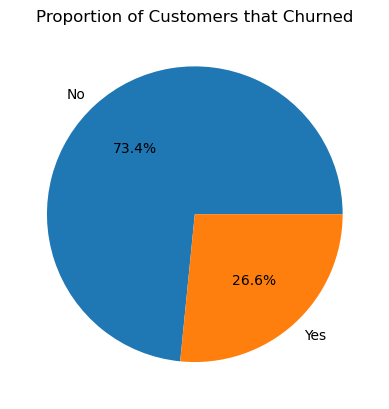

In [32]:
# Pie chart visulising how many customers stayed v churned
churn_counts = df['Churn Label'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Customers that Churned")
plt.show()

Note:
* We have a large data imbalance. 73.4% of our dataset have not churned, whereas 26.6% have churned.

In [34]:
# Churn reason and count of that reason
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

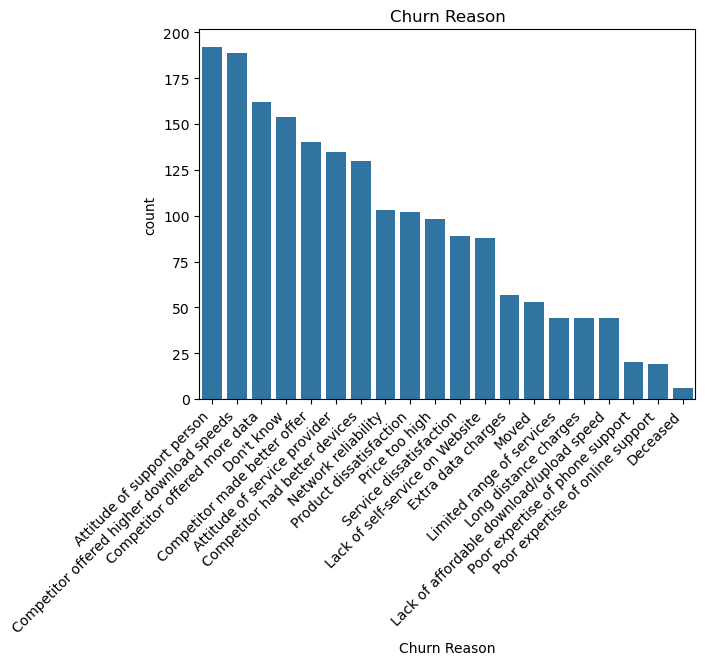

In [35]:
#Bar chart showing the churn reason and count of reason
churn_counts = df['Churn Reason'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Churn Reason')
plt.show()

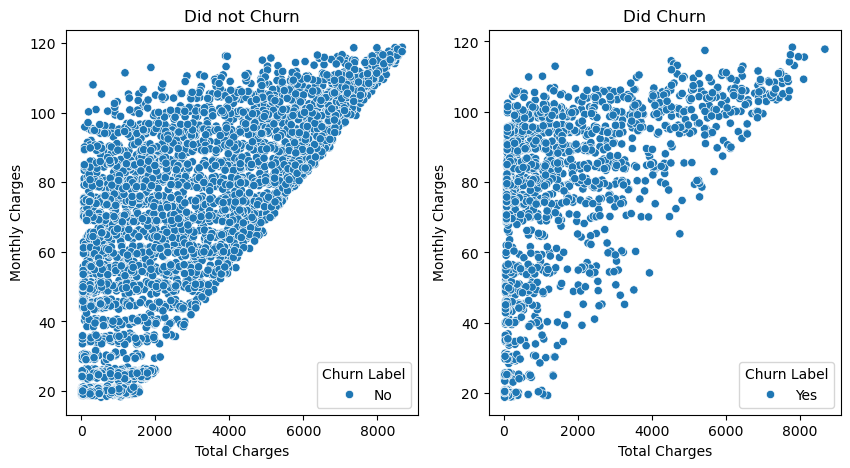

In [36]:
# Plot scatter plot of monthly charges and total charges for customers who churned and did not churn
plt.figure(figsize=(10, 5))

# Subplot for customers who did not churn
plt.subplot(1, 2, 1)
sns.scatterplot(data=df[df['Churn Label'] == 'No'], x='Total Charges', y='Monthly Charges', hue='Churn Label')
plt.title('Did not Churn')

# Subplot for customers who churned
plt.subplot(1, 2, 2)
sns.scatterplot(data=df[df['Churn Label'] == 'Yes'], x='Total Charges', y='Monthly Charges', hue='Churn Label')
plt.title('Did Churn')

plt.show()

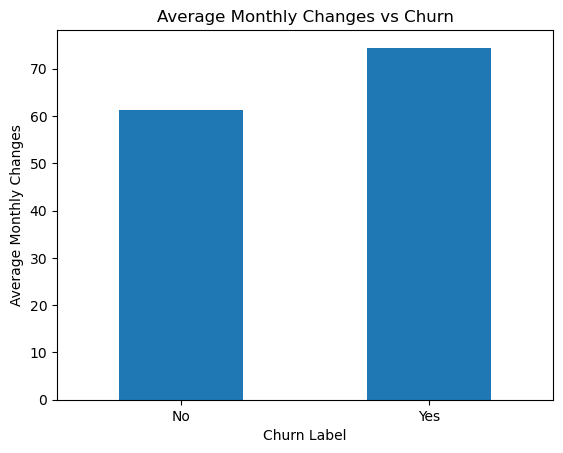

In [37]:
# Calculate the average monthly charges for each churn label
average_monthly_changes = df.groupby('Churn Label')['Monthly Charges'].mean()

# Create a bar plot to visualize the average monthly changes for each churn label
average_monthly_changes.plot(kind='bar')
plt.title('Average Monthly Changes vs Churn')
plt.xlabel('Churn Label')
plt.ylabel('Average Monthly Changes')
plt.xticks(rotation=0)
plt.show()

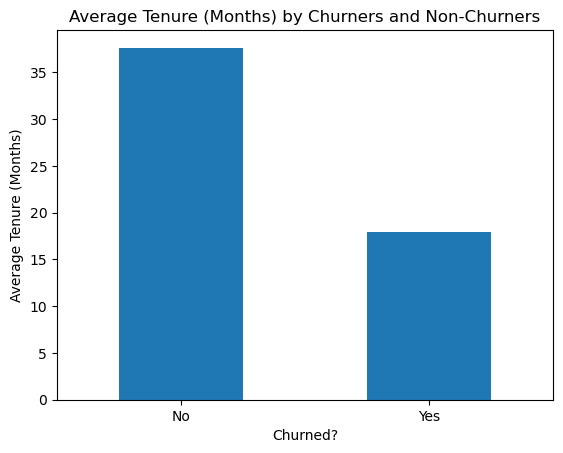

In [38]:
# Chart Averge length of Tenure 
Average_Months_Tenure = df['Tenure Months'].groupby(df['Churn Label']).mean()

Average_Months_Tenure.plot(kind='bar')
plt.title("Average Tenure (Months) by Churners and Non-Churners")
plt.xlabel('Churned?')
plt.ylabel('Average Tenure (Months)')
plt.xticks(rotation=0)
plt.show()


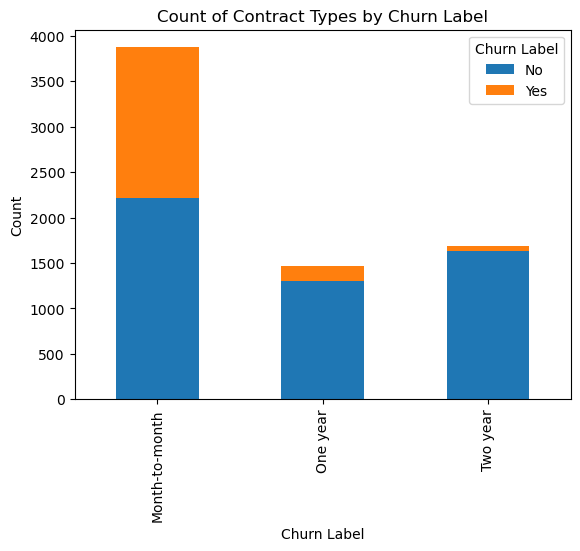

In [39]:
# Create a stacked bar plot to visualize the count of each contract type based on churn label
contract_churn_counts = df.groupby(['Contract', 'Churn Label']).size().unstack()
contract_churn_counts.plot(kind='bar', stacked=True)
plt.title('Count of Contract Types by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.show()

In [40]:
#Look at the summary statistics
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7032.0,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,1.0,93523.032565,36.283307,-119.799215,32.421786,64.798208,2283.300441,0.265785
std,0.0,1865.515958,2.456118,2.157588,24.545260,30.085974,2266.771362,0.441782
min,1.0,90001.000000,32.555828,-124.301372,1.000000,18.250000,18.800000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.587500,401.450000,0.000000
50%,1.0,93552.500000,36.391777,-119.735410,29.000000,70.350000,1397.475000,0.000000
75%,1.0,95354.000000,38.227285,-118.043237,55.000000,89.862500,3794.737500,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000


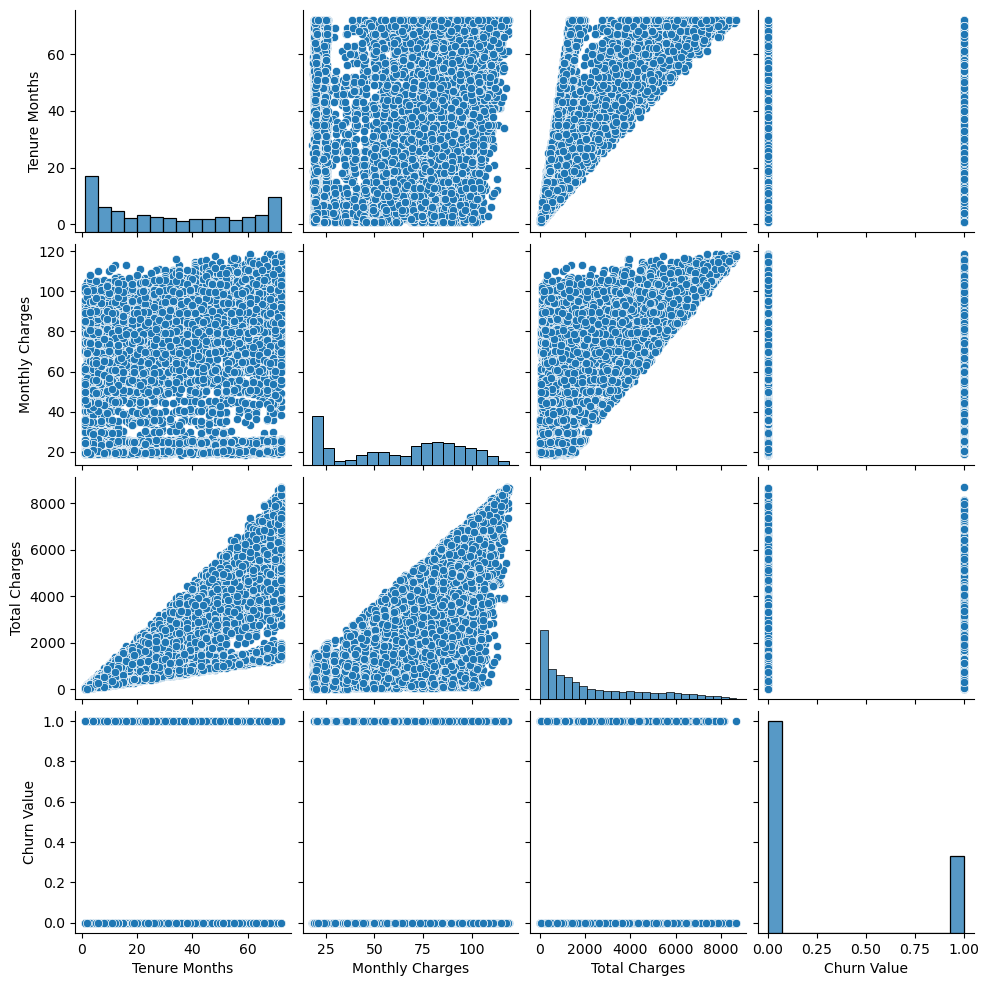

In [41]:
# Create a pairplot of the numerical columns with useful data
sns.pairplot(df[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']])
# Display the pairplot
plt.show()

In [42]:
# Calculate the correlation matrix for numeric columns only
df.corr(numeric_only=True)

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.895795,-0.784273,0.000287,-0.004956,-0.001462,0.003006
Latitude,NaN,0.895795,1.000000,-0.876777,-0.002100,-0.020302,-0.010313,-0.003600
Longitude,NaN,-0.784273,-0.876777,1.000000,-0.001477,0.024513,0.009047,0.004693
Tenure Months,NaN,0.000287,-0.002100,-0.001477,1.000000,0.246862,0.825880,-0.354049
Monthly Charges,NaN,-0.004956,-0.020302,0.024513,0.246862,1.000000,0.651065,0.192858
Total Charges,NaN,-0.001462,-0.010313,0.009047,0.825880,0.651065,1.000000,-0.199484
Churn Value,NaN,0.003006,-0.003600,0.004693,-0.354049,0.192858,-0.199484,1.000000


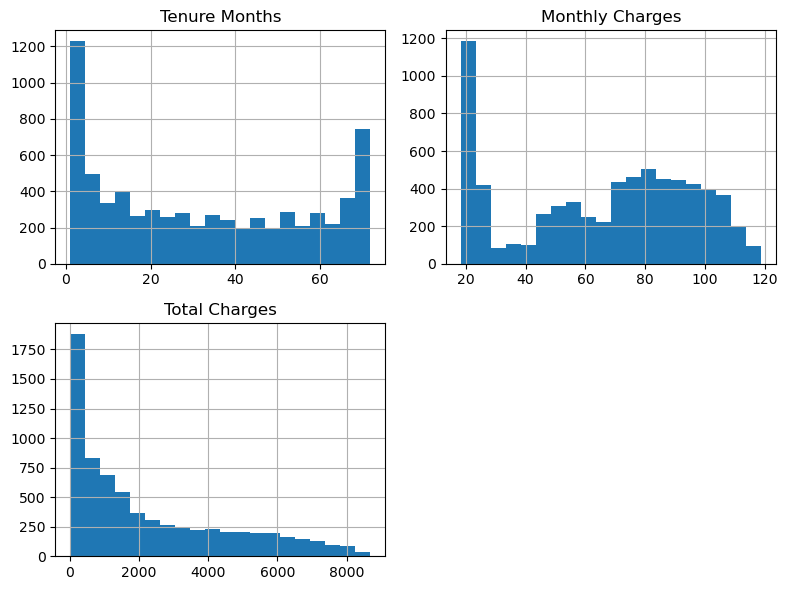

In [43]:
# Check the distribution of the data to see if there are any outliers
# Generate histograms for all columns
df.hist(column=['Tenure Months', 'Monthly Charges', 'Total Charges'], figsize=(8, 6), bins=20)

# Display the histograms
plt.tight_layout()
plt.show()

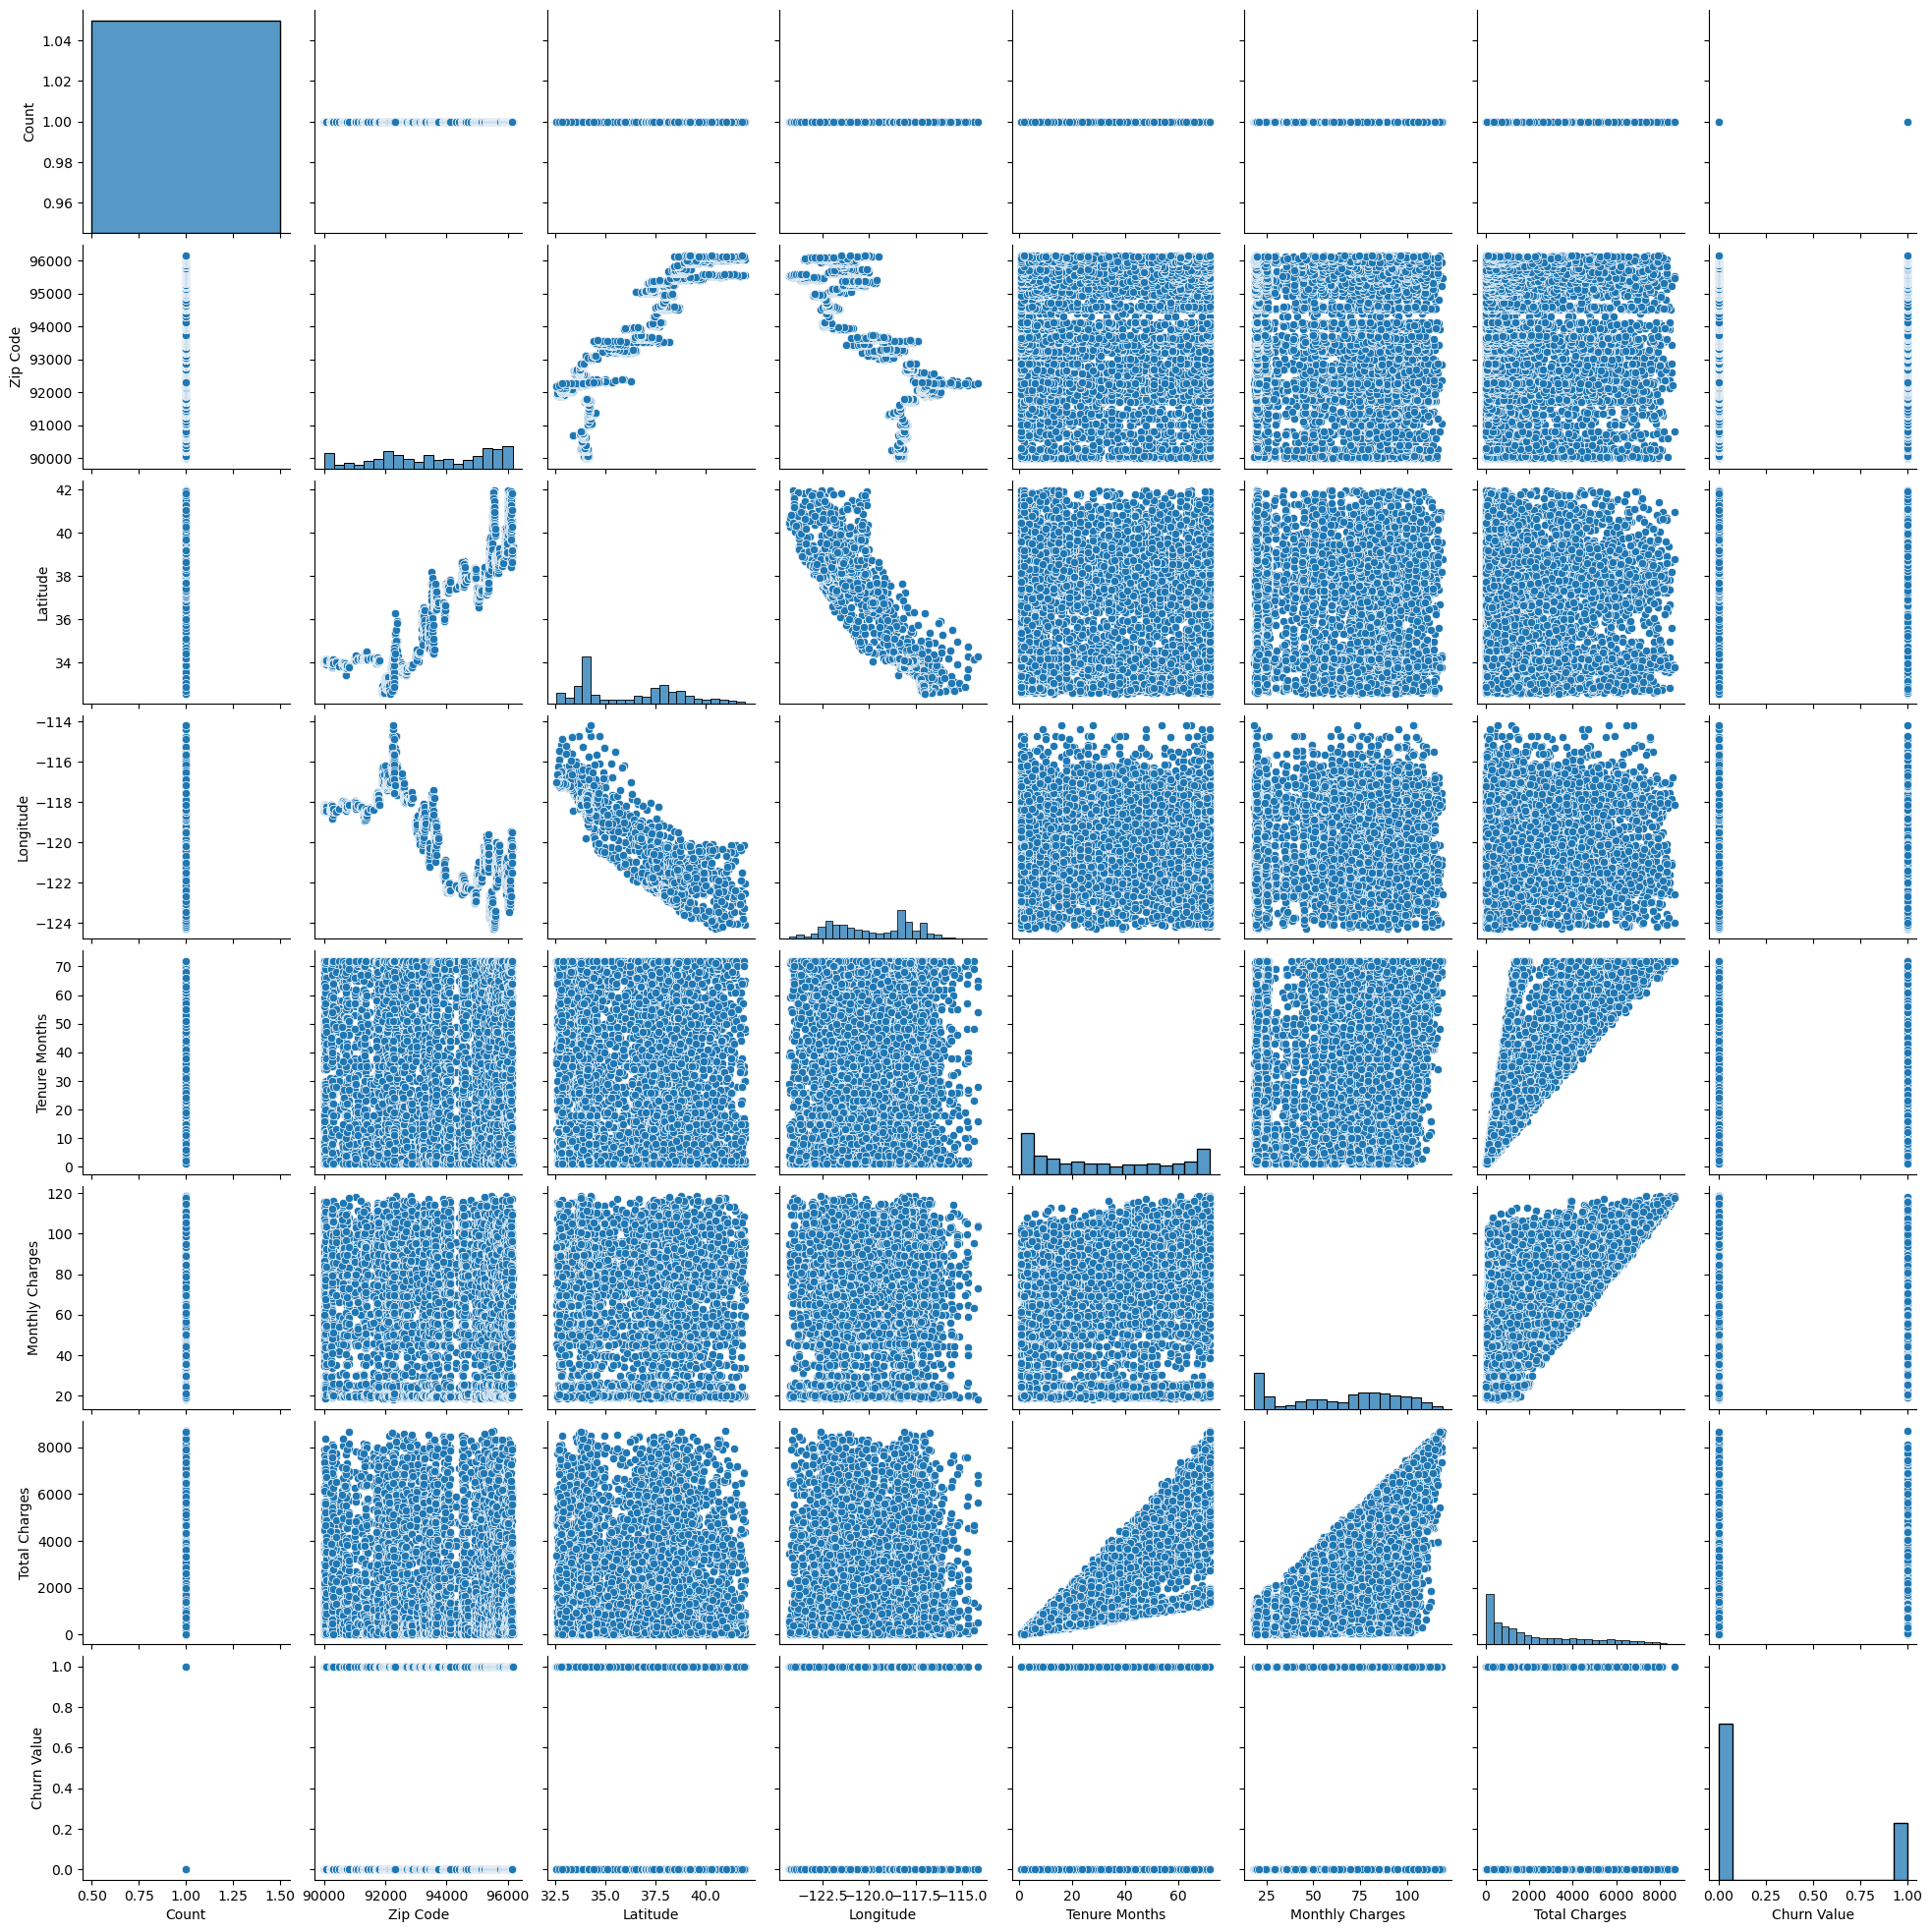

In [44]:
# Paiplot showing relationships between all the variables.
sns.pairplot(df)

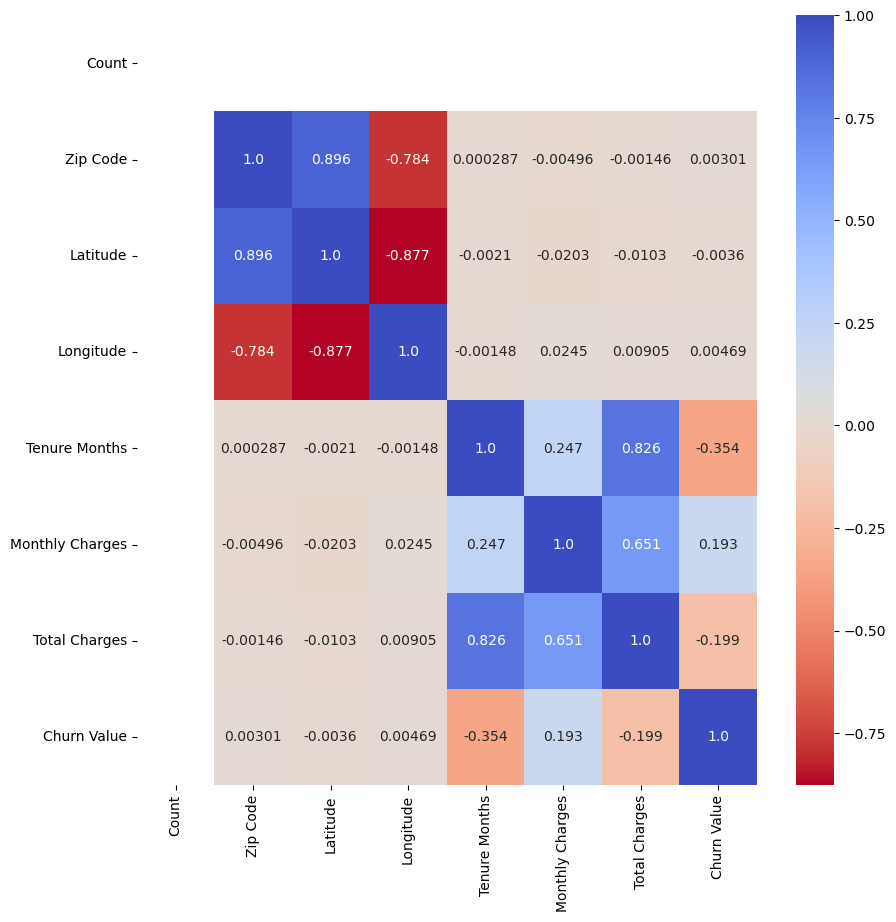

In [45]:
# Calculate the correlation matrix for numeric columns in the dataframe
correlation_matrix = df.corr(numeric_only=True)

# Set the size of the heatmap figure
plt.figure(figsize=(10, 10))

# Create a heatmap of the correlation matrix 
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3', 
            cmap='coolwarm_r')

# Display the heatmap
plt.show()

### 4 Feature Enigneering

In [47]:
# Function to calculate accuracy, precision, recall, and F1 score
def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)  # Calculate accuracy
    precision = metrics.precision_score(y_real, y_pred)  # Calculate precision
    recall = metrics.recall_score(y_real, y_pred)  # Calculate recall
    f1 = metrics.f1_score(y_real, y_pred)  # Calculate F1 score

    # Print the evaluation metrics
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")

    return accuracy, precision, recall, f1  # Return the evaluation metrics

# Function to count the occurrences of 'yes' in specified columns of a DataFrame
def add_unless_no(df, columns):
    def add_unless_no_row(row):
        total = 0
        for col in columns:
            if "no" not in str(row[col]).lower():  # Check if the value in the column contains 'no'
                total += 1  # Increment the total count if 'no' is not present
        return total  # Return the total count

    return df.apply(add_unless_no_row, axis=1)  # Apply the function to each row of the DataFrame

# Function to map 'No' to 0 and 'Yes' to 1 in a column, if applicable
def map_no_yes(column):
    unique_values = column.dropna().unique()  # Get unique non-null values in the column
    if set(unique_values).issubset({'No', 'Yes'}):  # Check if the unique values are only 'No' and 'Yes'
        return column.replace({'Yes': 1, 'No': 0})  # Replace 'Yes' with 1 and 'No' with 0
    return column  # Return the original column if the unique values are not only 'No' and 'Yes'

In [48]:
# Feature Engineering

# Make a copy of the dataframe
data = df.copy()

# Drop unnecessary columns from the DataFrame
data = data.drop(columns = ['Count', 'Country', 'State',
                            'Latitude', 'Longitude', 'Zip Code', 'Lat Long',
                            'City', 'Churn Label', 'Churn Reason'])

# Replace 'Female' with 1 and 'Male' with 0 in the 'Gender' column
data['Gender'] = data['Gender'].replace({'Female': 1, 'Male': 0})

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Internet Service', 'Payment Method', 'Multiple Lines',
                                     'Streaming TV', 'Streaming Movies', 'Online Security',
                                     'Online Backup', 'Device Protection', 'Tech Support', 'Contract'],
                      drop_first=True, dtype = int)

# Replace empty strings with None and drop rows with missing values
data = data.replace(' ', None).dropna()

#Create copy of all data after fe for later use in predictions
original_data = data.copy()

# Drop the 'CustomerID' column from the DataFrame
data = data.drop(columns = 'CustomerID')

cols = data.columns

# Apply the function 'map_no_yes' to each column in the DataFrame
data = data.apply(map_no_yes)

# Scale the features to a range using MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = cols)

In [49]:
#Display the first five rows of our feature engineered datframe
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Multiple Lines_No phone service,Multiple Lines_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year
0,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.098592,1.0,1.0,0.809950,0.092511,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.380282,1.0,1.0,0.861194,0.349325,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.676056,1.0,1.0,0.850249,0.578987,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


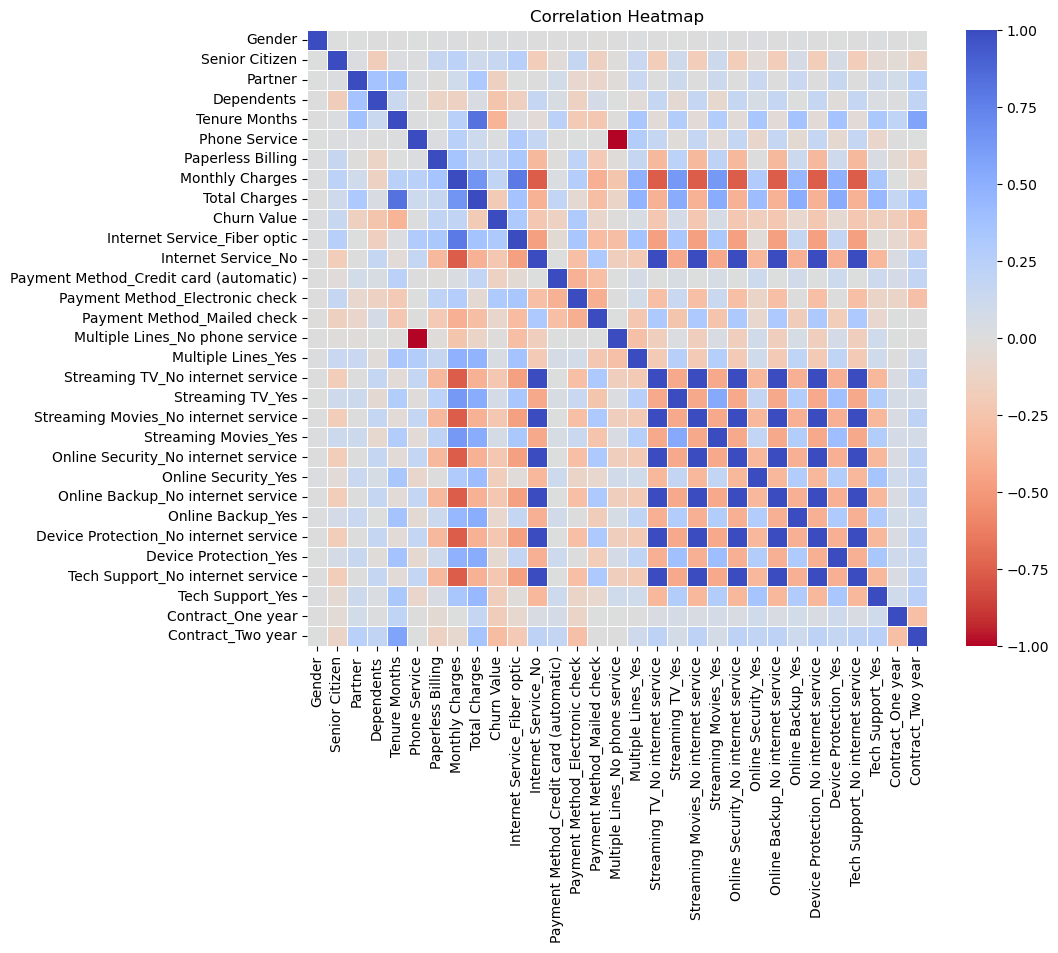

In [50]:
#Corrlation Matrix of our feature engineered dataframe
correlation_matrix = data.corr(numeric_only = True)

plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, cmap='coolwarm_r', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 4.1 Train, Test, Split

In [52]:
# Get the list of column names from the dataset
features = list(data.columns)

# Remove the target variable 'Churn Value' from the list of features
features.remove('Churn Value')

# Assign the target variable 'Churn Value' to y
y = data['Churn Value']

# Assign the features to X
X = data[features]

# Check the type of X and y
type(X)
type(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1204, #stratify=y
                                                   )

In [53]:
# Our data is very imbalanced, so we will address this 
# Create an instance of the SMOTE (Synthetic Minority Over-sampling Technique) algorithm with a specified random state
oversample = SMOTE(random_state=42)

# Resample the training data using SMOTE to handle class imbalance
X_train, y_train = oversample.fit_resample(X_train, y_train)


In [54]:
# Check if the indices of the training data X_train and y_train are the same
all(X_train.index == y_train.index)

# Check if the indices of the testing data X_test and y_test are the same
all(X_test.index == y_test.index)

True

### 5. Modelling - Random Forest

In [56]:
# Create a Random Forest classifier with 50 trees
rf = RandomForestClassifier(n_estimators=50)

# Perform cross-validation on the training data using the Random Forest classifier
rf_score = cross_val_score(rf, X_train, y_train, cv=5)

# Print the cross-validation scores
print(f'Random scored {rf_score}')

Random scored [0.78960097 0.7980653  0.88029021 0.89897157 0.8892922 ]


In [57]:
# Define the parameters for the random forest model
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}

# Create a grid search object with the random forest model and parameters
gs = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring = 'recall', verbose=1)

# Fit the grid search to the training data
gs.fit(X_train, y_train)

# Print the best cross-validated score
print(gs.best_score_)

# Display the best parameters found by the grid search
gs.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.8860676736417108


{'max_depth': 1, 'n_estimators': 200}

In [58]:
# Calculate the score of the model using the training data
gs.score(X_train, y_train)

0.8991291727140783

In [59]:
# Save best model as a random forest model
best_rf = gs.best_estimator_

In [60]:
# Use the model to predict on X_train
y_pred = best_rf.predict(X_train)

In [61]:
# Print the most importance predictive features of our model
print(sorted(list(zip(X_train.columns, best_rf.feature_importances_)), key=lambda x: x[1], reverse=True))

[('Contract_Two year', 0.15), ('Payment Method_Electronic check', 0.135), ('Dependents', 0.12), ('Tenure Months', 0.105), ('Streaming Movies_No internet service', 0.08), ('Device Protection_No internet service', 0.075), ('Online Security_No internet service', 0.065), ('Internet Service_Fiber optic', 0.05), ('Tech Support_No internet service', 0.05), ('Online Backup_No internet service', 0.045), ('Internet Service_No', 0.035), ('Paperless Billing', 0.02), ('Online Security_Yes', 0.02), ('Monthly Charges', 0.015), ('Streaming TV_No internet service', 0.015), ('Tech Support_Yes', 0.015), ('Total Charges', 0.005), ('Gender', 0.0), ('Senior Citizen', 0.0), ('Partner', 0.0), ('Phone Service', 0.0), ('Payment Method_Credit card (automatic)', 0.0), ('Payment Method_Mailed check', 0.0), ('Multiple Lines_No phone service', 0.0), ('Multiple Lines_Yes', 0.0), ('Streaming TV_Yes', 0.0), ('Streaming Movies_Yes', 0.0), ('Online Backup_Yes', 0.0), ('Device Protection_Yes', 0.0), ('Contract_One year', 

In [62]:
## Predict on Train
## Check Accuracy, Precision, Recall & F1

train_results = apr(y_pred, y_train)

Accuracy:0.764392839864538
Precision:0.7082698170731707
Recall:0.8991291727140783
F1:0.7923683649541676


In [63]:
## Predict on Test
## Check Accuracy, Precision, Recall & F1

#Use model to predict on X test
y_test_pred = best_rf.predict(X_test)

test_results = apr(y_test_pred, y_test)

Accuracy:0.6886993603411514
Precision:0.4581005586592179
Recall:0.8677248677248677
F1:0.5996343692870201


In [64]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.6886993603411514
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.62      0.75      1029
         1.0       0.46      0.87      0.60       378

    accuracy                           0.69      1407
   macro avg       0.69      0.75      0.67      1407
weighted avg       0.80      0.69      0.71      1407

Confusion Matrix:
[[641 388]
 [ 50 328]]


### 5.1 Modeling - Logistic Regression

In [66]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

In [67]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
## Now that the model is fit, we can make our prediction. 
logreg.predict_proba(X_train)

array([[0.86494575, 0.13505425],
       [0.56410563, 0.43589437],
       [0.99832825, 0.00167175],
       ...,
       [0.83546393, 0.16453607],
       [0.12976783, 0.87023217],
       [0.11217917, 0.88782083]])

In [69]:
# Make predictions on the train set
y_pred = logreg.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Classification Report:")
print(classification_report(y_train, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.7902757619738752
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      4134
         1.0       0.77      0.84      0.80      4134

    accuracy                           0.79      8268
   macro avg       0.79      0.79      0.79      8268
weighted avg       0.79      0.79      0.79      8268

Confusion Matrix:
[[3082 1052]
 [ 682 3452]]


In [70]:
# Define the hyperparameter grid
param_grid = {
    'l1_ratio': [i/10 for i in range(11)],
    'C': [0.1, 1, 10],
    'max_iter': [40000, 80000, 120000]
}

# Create an Elastic Net Logistic Regression model
elastic_net_model = LogisticRegression(penalty='elasticnet', solver='saga')

# Create a GridSearchCV object
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=5, scoring='recall')

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_en_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred = best_en_model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
matrix = confusion_matrix(y_train, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)

Best Hyperparameters: {'C': 10, 'l1_ratio': 0.5, 'max_iter': 40000}
Best Score: 0.8374506296277862
Accuracy: 0.7924528301886793
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78      4134
         1.0       0.77      0.84      0.80      4134

    accuracy                           0.79      8268
   macro avg       0.80      0.79      0.79      8268
weighted avg       0.80      0.79      0.79      8268

Confusion Matrix:
[[3079 1055]
 [ 661 3473]]


### 6. Customer Churn Predictions

In [72]:
# Filtering for churn = 1
original_data = original_data.loc[original_data['Churn Value'] == 0]

# Extracting and removing ID
ID = original_data['CustomerID']
original_data = original_data.drop(columns='CustomerID')
cols = original_data.columns

In [73]:
original_data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Multiple Lines_No phone service,Multiple Lines_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year
1869,1,No,Yes,No,1,No,Yes,29.85,29.85,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1870,0,No,No,No,34,Yes,No,56.95,1889.50,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1871,0,No,No,No,45,No,No,42.30,1840.75,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
1872,0,No,No,Yes,22,Yes,Yes,89.10,1949.40,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1873,1,No,No,No,10,No,No,29.75,301.90,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [74]:
# Apply the function to each column in the DataFrame
original_data = original_data.apply(map_no_yes)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
original_data = scaler.fit_transform(original_data)

# Convert the scaled data back to a DataFrame
original_data = pd.DataFrame(original_data, columns=cols)

# Split the churn data into X and y
feature = list(original_data.columns)
feature.remove('Churn Value')
churn_y = original_data['Churn Value']
churn_X = original_data[feature]

In [75]:
# Get the probabilities of churning
churn_probs = best_en_model.predict_proba(churn_X)[:, 1] * 100

# Create a DataFrame with the customer IDs and probabilities
results_df = pd.DataFrame({'CustomerID': ID, 'Churn Probability %': churn_probs.round(2)})

results_df = results_df.sort_values(by='Churn Probability %', ascending=False)

# Get the top 500 results
top_500_results_df = results_df.head(500)

# Export the results to a CSV file
results_df.to_csv('Customer List of Churn Risk.csv', index=False)

# Export the results to a CSV file
top_500_results_df.to_csv('500 Most Likely to Churn.csv', index=False)

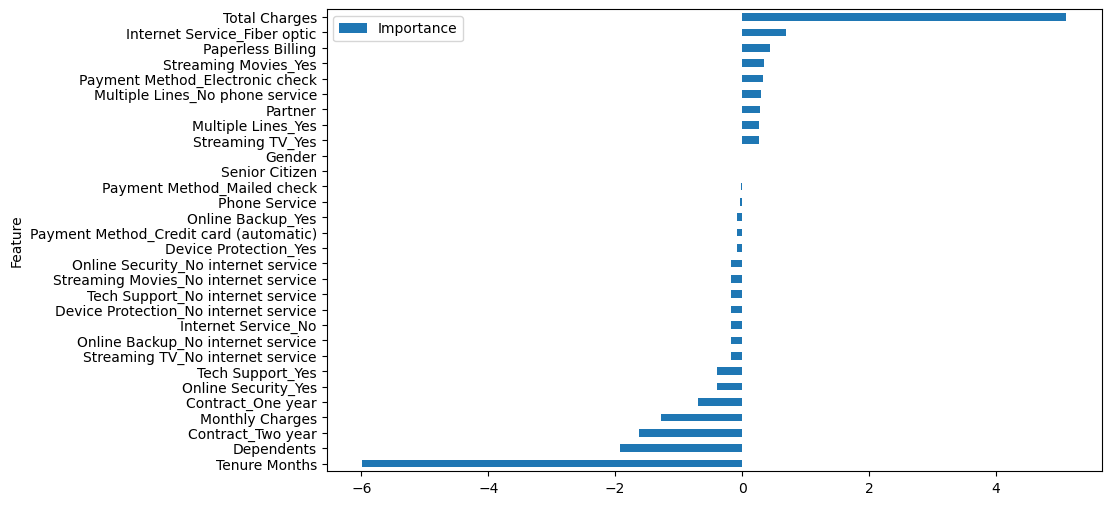

In [76]:
# Extracting raw model coefficients
coefficients = best_en_model.coef_

# Calculating and plotting feature importance
avg_importance = np.mean(coefficients, axis=0)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

In [77]:
feature_importance_top = feature_importance.sort_values('Importance', ascending=True)

In [78]:
feature_importance_top.head(10)

,Feature,Importance
4,Tenure Months,-5.993924
3,Dependents,-1.922025
29,Contract_Two year,-1.623453
7,Monthly Charges,-1.275648
28,Contract_One year,-0.694577
21,Online Security_Yes,-0.400097
27,Tech Support_Yes,-0.390952
16,Streaming TV_No internet service,-0.168722
22,Online Backup_No internet service,-0.168722
10,Internet Service_No,-0.168722


In [79]:
feature_importance_bottom = feature_importance.sort_values('Importance', ascending=False)
feature_importance_bottom.head()

,Feature,Importance
8,Total Charges,5.109780
9,Internet Service_Fiber optic,0.686522
6,Paperless Billing,0.433905
19,Streaming Movies_Yes,0.348250
12,Payment Method_Electronic check,0.329816


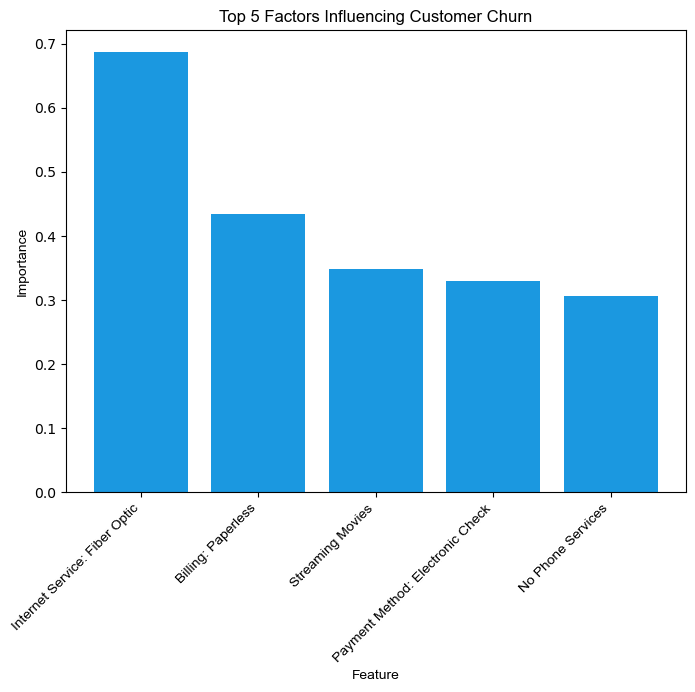

In [80]:
## CUSTOMER CHURN FACTORS

bottom_5 = feature_importance_bottom.iloc[1:].head(5)
plt.figure(figsize=(8, 6))
bars = plt.bar(bottom_5['Feature'], bottom_5['Importance'], color='#1B98E0')
plt.xlabel('Feature', fontname='Arial')  # Change the font of the x-axis label
plt.ylabel('Importance', fontname='Arial')  # Change the font of the y-axis label
plt.xticks(rotation=45, ha='right', fontname='Arial')  # Change the font of the x-axis ticks
plt.title('Top 5 Factors Influencing Customer Churn', fontname='Arial')  # Change the font of the title
plt.xticks(bottom_5['Feature'], ['Internet Service: Fiber Optic', 'Billing: Paperless', 'Streaming Movies', 'Payment Method: Electronic Check', 'No Phone Services'], fontname='Arial')  # Change the labels on the x-axis
plt.savefig('Top_5_Factors_Influencing_Customer_Churn.png', bbox_inches='tight', transparent=True)  # Save the entire graph including labels
plt.show()

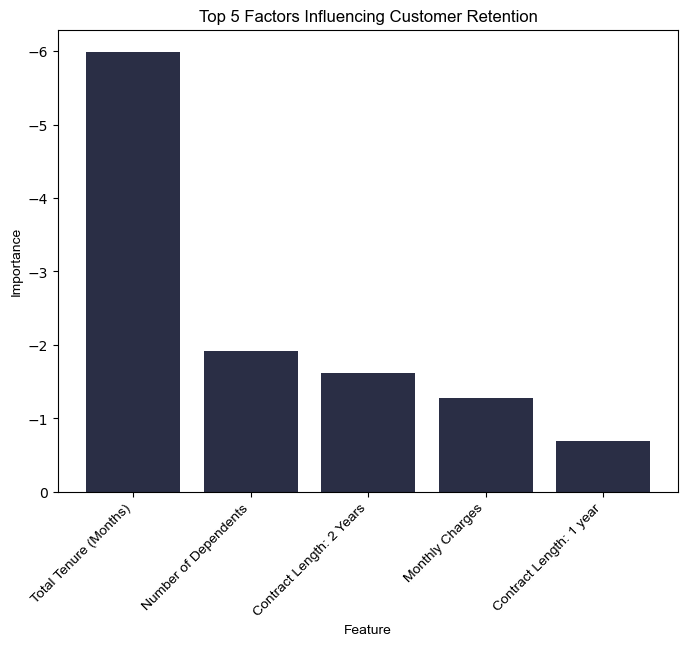

In [81]:
## CUSTOMER RETENTION FACTORS

top_5 = feature_importance_top.head(5)
plt.figure(figsize=(8, 6))
bars = plt.bar(top_5['Feature'], top_5['Importance'], color='#2A2E45')
plt.gca().invert_yaxis()
plt.xlabel('Feature', fontname='Arial')  # Change the font of the x-axis label
plt.ylabel('Importance', fontname='Arial')  # Change the font of the y-axis label
plt.xticks(rotation=45, ha='right', fontname='Arial')  # Change the font of the x-axis ticks
plt.title('Top 5 Factors Influencing Customer Retention', fontname='Arial')  # Change the font of the title
plt.xticks(top_5['Feature'], ['Total Tenure (Months)', 'Number of Dependents', 'Contract Length: 2 Years', 'Monthly Charges', 'Contract Length: 1 year'], fontname='Arial')  # Change the labels on the x-axis
plt.savefig('Top_5_Factors_Influencing_Customer_Retention.png', bbox_inches='tight', transparent=True)  # Save the entire graph including labels
plt.show()